<a href="https://colab.research.google.com/github/manojgautamx/Assessment1/blob/main/2409334_ManojGautam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Specify the file path in Google Drive
file_path = '/content/drive/My Drive/World Happiness Report.csv'

# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from Google Drive
df = pd.read_csv(file_path)

# ------------------ Data Exploration and Understanding ------------------


In [ ]:
# 1. Display the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

In [ ]:
# 2. Identify the number of rows and columns
rows, cols = df.shape
print(f"\nNumber of rows: {rows}, Number of columns: {cols}")


Number of rows: 143, Number of columns: 10


In [ ]:
# 3. List all columns and their data types
print("\nColumns and their data types:")
print(df.dtypes)


Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
Happiness Category               object
dtype: object


In [ ]:
# ------------------ Basic Statistics ------------------

# 1. Calculate mean, median, and standard deviation for the score column
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()
print(f"\nMean Score: {mean_score}, Median Score: {median_score}, Standard Deviation: {std_score}")


Mean Score: 5.52758041958042, Median Score: 5.785, Standard Deviation: 1.1707165099442995


In [ ]:
# 2. Country with the highest and lowest happiness scores
highest_score = df[df['score'] == df['score'].max()]
lowest_score = df[df['score'] == df['score'].min()]
print(f"\nCountry with the highest score: {highest_score['Country name'].values[0]} (Score: {highest_score['score'].values[0]})")
print(f"Country with the lowest score: {lowest_score['Country name'].values[0]} (Score: {lowest_score['score'].values[0]})")


Country with the highest score: Finland (Score: 7.741)
Country with the lowest score: Afghanistan (Score: 1.721)


In [ ]:
# ------------------ Missing Values ------------------

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
# ------------------ Filtering and Sorting ------------------

# 1. Filter countries with a score > 7.5
filtered_df = df[df['score'] > 7.5]
print("\nCountries with Score > 7.5:")
print(filtered_df)


Countries with Score > 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual Happiness Category  
0                      0.546                2.082               High  
1                      0.548                1.881               High  
2                      0.182                2.050               High  


In [ ]:
# 2. Sort filtered dataset by Log GDP per capita in descending order and display the top 10 rows
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
print("\nTop 10 countries with Score > 7.5 sorted by Log GDP per capita:")
print(sorted_df.head(10))


Top 10 countries with Score > 7.5 sorted by Log GDP per capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual Happiness Category  
1                      0.548                1.881               High  
2                      0.182                2.050               High  
0                      0.546                2.082               High  


In [ ]:
# ------------------ Adding New Columns ------------------

# 1. Create a new column 'Happiness Category'
def happiness_category(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(happiness_category)
print("\nDataset with Happiness Category added:")
print(df[['Country name', 'score', 'Happiness Category']].head())


Dataset with Happiness Category added:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High


<ipython-input-21-ff42d42af19a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_happiest, x='score', y='Country name', palette='viridis')


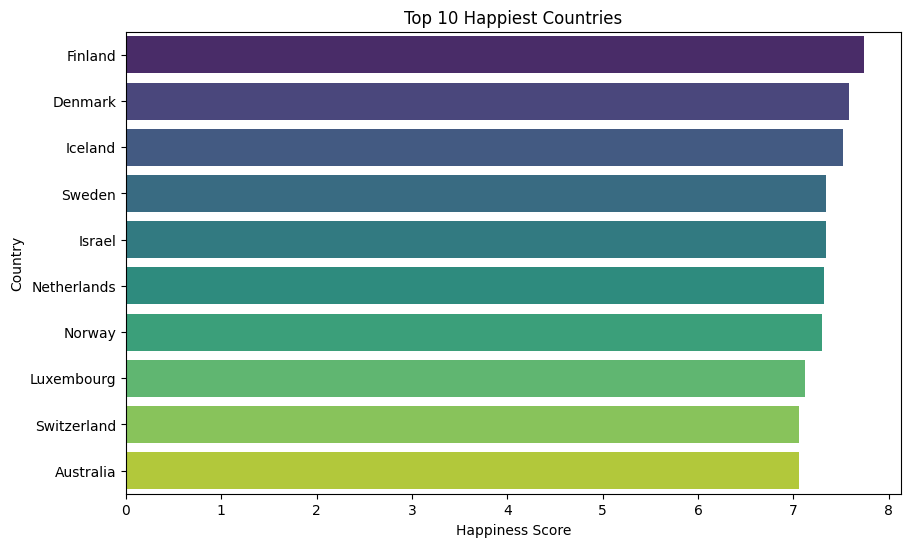

In [ ]:
# ------------------ Data Visualizations ------------------

# 1. Bar Plot: Top 10 happiest countries by score
top_10_happiest = df.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_happiest, x='score', y='Country name', palette='viridis')
plt.title('Top 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

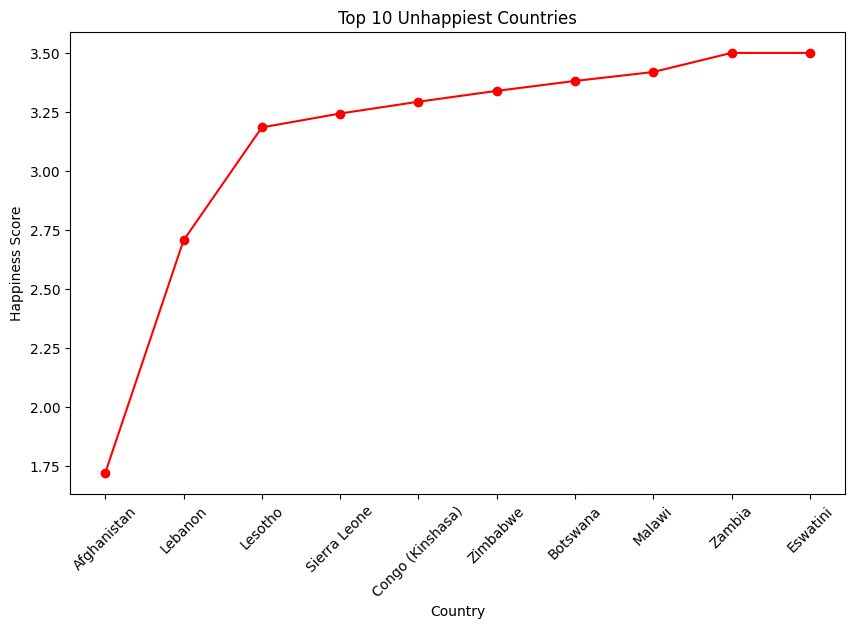

In [ ]:
# 2. Line Plot: Top 10 unhappiest countries by score
top_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', linestyle='-', color='r')
plt.title('Top 10 Unhappiest Countries')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

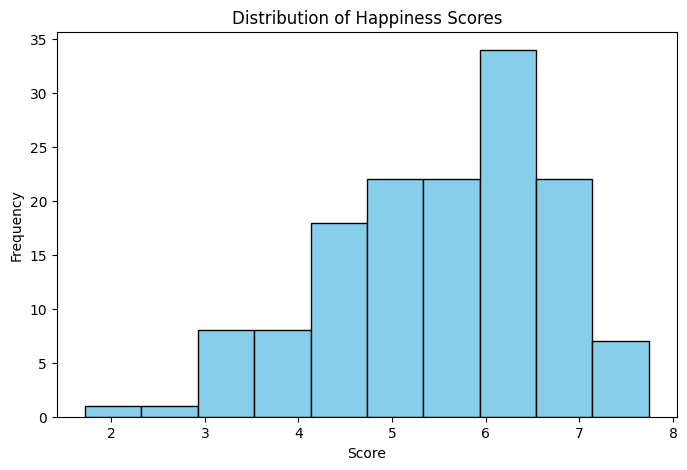

In [ ]:
# 3. Histogram for score distribution
plt.figure(figsize=(8, 5))
plt.hist(df['score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

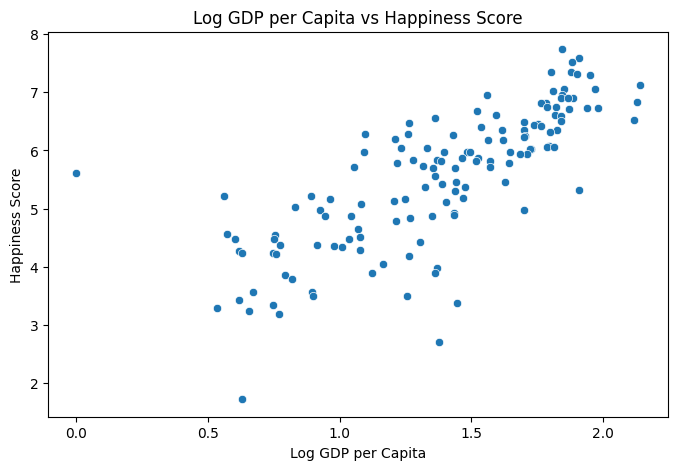

In [ ]:
# 4. Scatter Plot: Log GDP per capita vs score
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Log GDP per capita', y='score')
plt.title('Log GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

3.2 Problem - 2 - Some Advance Data Exploration Task:

In [ ]:
# Task 1: Setup Task - Preparing the South Asia Dataset
# ---------------------------------------------------------------------
# Define South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter dataset for South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Save the filtered dataset as a separate CSV file
south_asia_df.to_csv('/content/drive/My Drive/South_Asia_Happiness_Report.csv', index=False)
print("\nSouth Asia dataset saved successfully.")
print(south_asia_df)


South Asia dataset saved successfully.
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   



South Asian countries ranked by Composite Score:
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


<ipython-input-25-dc8a7cfd092d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_composite, x='Composite Score', y='Country name', palette='viridis', legend=False)


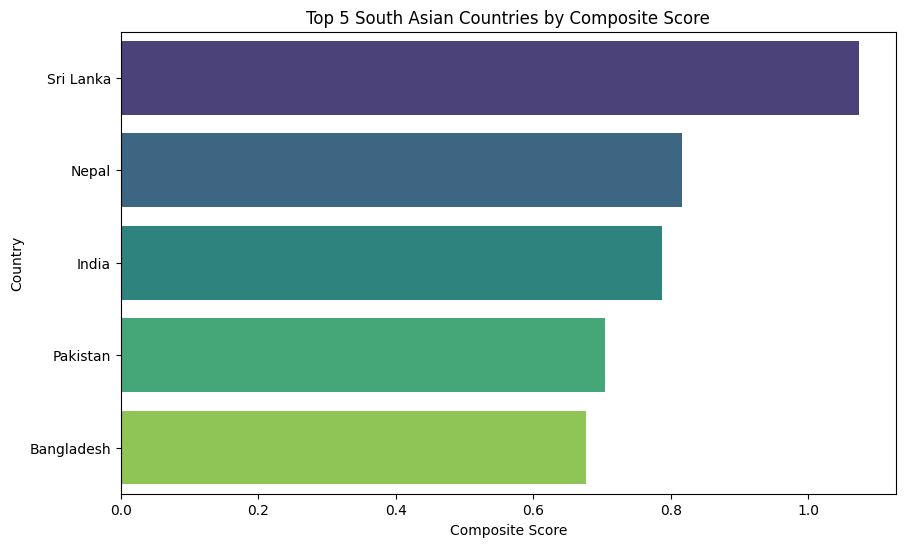

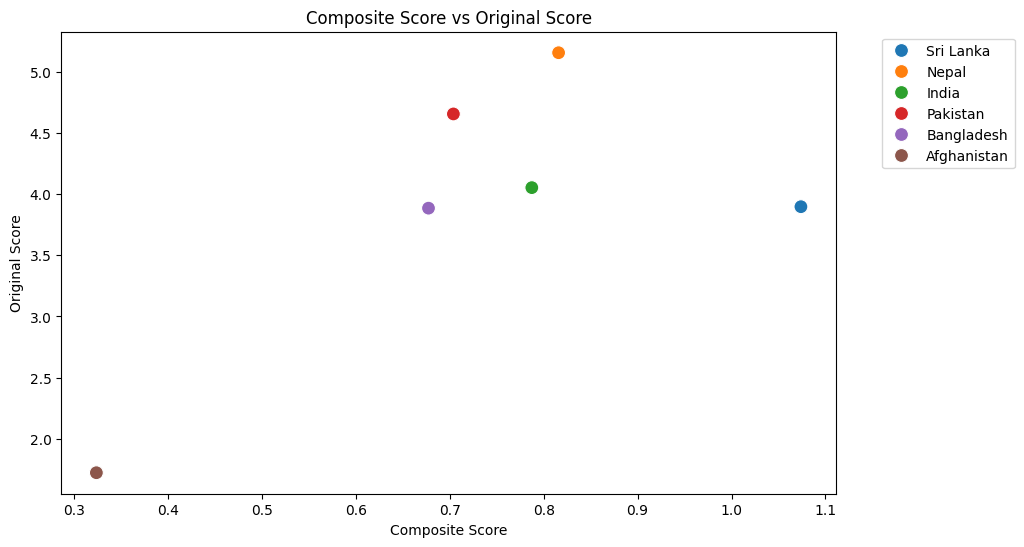

In [ ]:
# Task 2: Composite Score Ranking
# ---------------------------------------------------------------------
# Calculate Composite Score
south_asia_df.loc[:, 'Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +
                                           0.30 * south_asia_df['Social support'] +
                                           0.30 * south_asia_df['Healthy life expectancy'])

# Rank countries based on Composite Score
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)
print("\nSouth Asian countries ranked by Composite Score:")
print(south_asia_df[['Country name', 'Composite Score']])

# Visualize top 5 countries by Composite Score
top_5_composite = south_asia_df.nlargest(5, 'Composite Score')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_composite, x='Composite Score', y='Country name', palette='viridis', legend=False)
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

# Discussion: Compare rankings based on Composite Score and original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=south_asia_df, x='Composite Score', y='score', hue='Country name', s=100)
plt.title('Composite Score vs Original Score')
plt.xlabel('Composite Score')
plt.ylabel('Original Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



Outlier countries in South Asia based on GDP per Capita and Score:
    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
142                      0.088                0.672                Low   

     Composite Score  
142           0.3238  


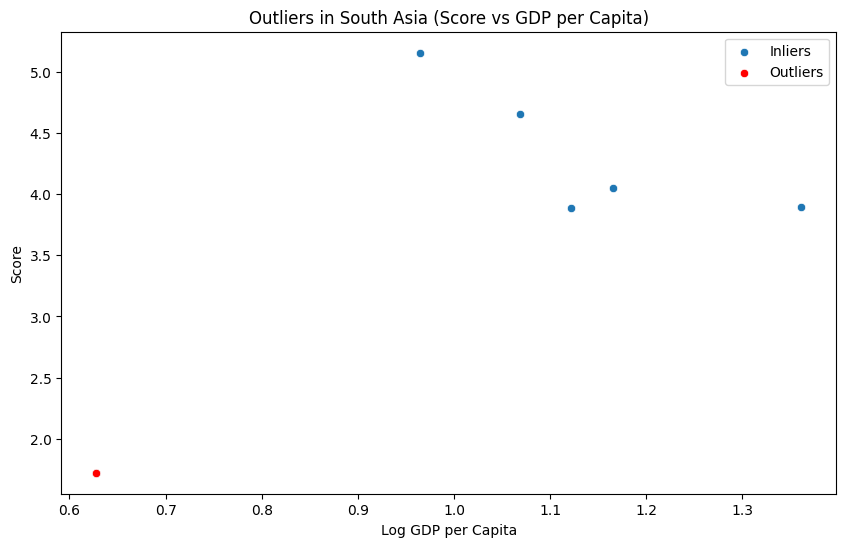

In [ ]:
# Task 3: Outlier Detection
# ---------------------------------------------------------------------
# Define outliers using the 1.5x IQR rule for GDP per Capita and Score
q1_gdp, q3_gdp = south_asia_df['Log GDP per capita'].quantile([0.25, 0.75])
iqr_gdp = q3_gdp - q1_gdp
lower_gdp = q1_gdp - 1.5 * iqr_gdp
upper_gdp = q3_gdp + 1.5 * iqr_gdp

q1_score, q3_score = south_asia_df['score'].quantile([0.25, 0.75])
iqr_score = q3_score - q1_score
lower_score = q1_score - 1.5 * iqr_score
upper_score = q3_score + 1.5 * iqr_score

# Identify outliers
outliers = south_asia_df[(south_asia_df['Log GDP per capita'] < lower_gdp) |
                         (south_asia_df['Log GDP per capita'] > upper_gdp) |
                         (south_asia_df['score'] < lower_score) |
                         (south_asia_df['score'] > upper_score)]

print("\nOutlier countries in South Asia based on GDP per Capita and Score:")
print(outliers)

# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=south_asia_df, x='Log GDP per capita', y='score', label='Inliers')
sns.scatterplot(data=outliers, x='Log GDP per capita', y='score', color='red', label='Outliers')
plt.title('Outliers in South Asia (Score vs GDP per Capita)')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()


Correlation with Score:
Freedom to make life choices: 0.8005185224163315
Generosity: 0.874512371253192


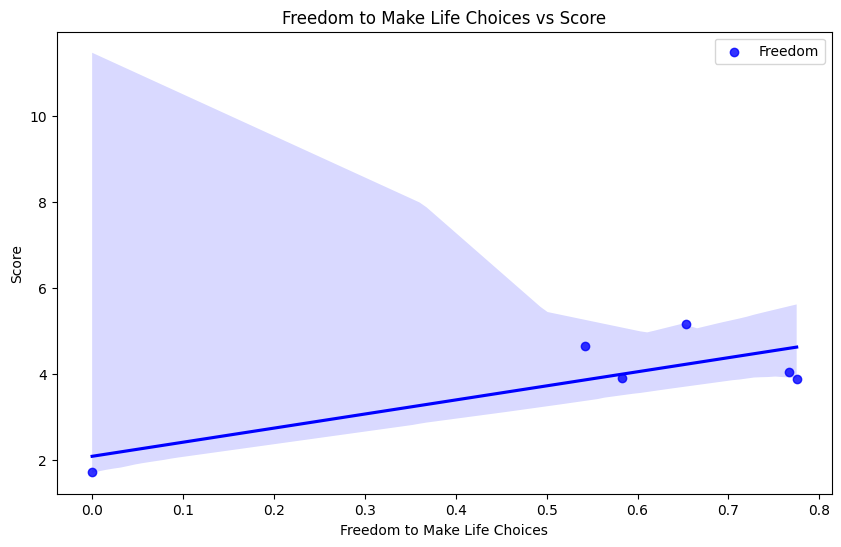

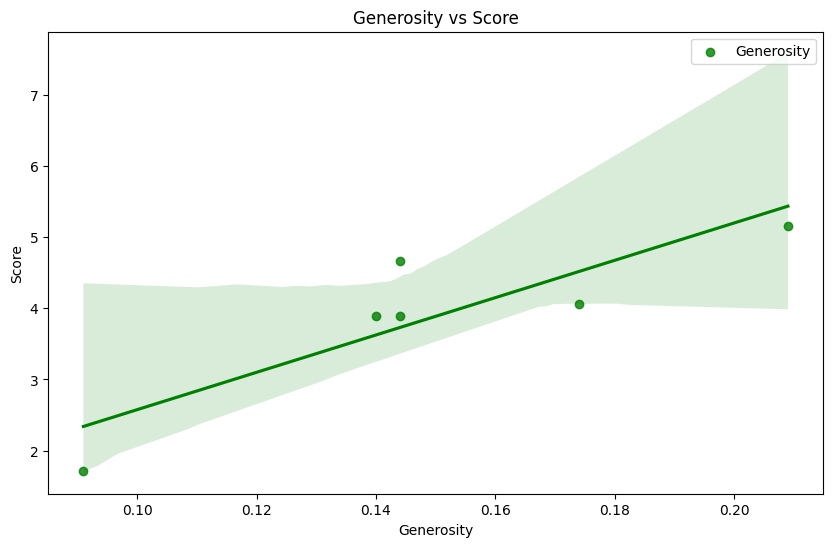

In [ ]:
# Task 4: Exploring Trends Across Metrics
# ---------------------------------------------------------------------
# Calculate Pearson correlation
freedom_corr = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
generosity_corr = south_asia_df['Generosity'].corr(south_asia_df['score'])
print(f"\nCorrelation with Score:")
print(f"Freedom to make life choices: {freedom_corr}")
print(f"Generosity: {generosity_corr}")

# Scatter plots with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(data=south_asia_df, x='Freedom to make life choices', y='score', color='blue', label='Freedom')
plt.title('Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=south_asia_df, x='Generosity', y='score', color='green', label='Generosity')
plt.title('Generosity vs Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.legend()
plt.show()

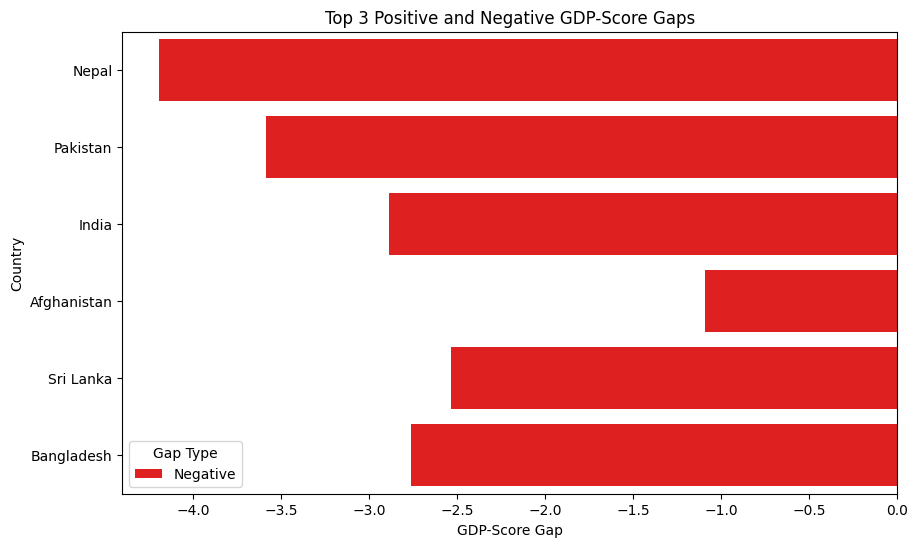

In [ ]:
# Task 5: Gap Analysis
# ---------------------------------------------------------------------
# Add a column to classify positive and negative gaps
south_asia_df['Gap Type'] = south_asia_df['GDP-Score Gap'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Select the top 3 positive and negative gaps
ascending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

top_gaps = pd.concat([ascending_gap.head(3), descending_gap.head(3)])

# Plot the top gaps
plt.figure(figsize=(10, 6))
sns.barplot(data=top_gaps, x='GDP-Score Gap', y='Country name', hue='Gap Type', dodge=False, palette={'Positive': 'green', 'Negative': 'red'})
plt.title('Top 3 Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()


3.3 Problem - 3 - Comparative Analysis:

In [ ]:
# Task - 1: Setup Middle Eastern Dataset
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon",
    "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
    "United Arab Emirates", "Yemen"
]

# Filter Middle Eastern countries
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

# Ensure Middle East and South Asia datasets are ready
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

In [ ]:
# ---------------------------------------------------------------------
# Task - 2: Descriptive Statistics
# ---------------------------------------------------------------------
# Calculate mean and standard deviation for both regions
sa_mean = south_asia_df['score'].mean()
me_mean = middle_east_df['score'].mean()
sa_std = south_asia_df['score'].std()
me_std = middle_east_df['score'].std()

print(f"\nSouth Asia - Mean Score: {sa_mean}, Std Dev: {sa_std}")
print(f"Middle East - Mean Score: {me_mean}, Std Dev: {me_std}")

# Which region has higher happiness scores on average?
if sa_mean > me_mean:
    print("\nSouth Asia has higher average happiness scores.")
else:
    print("\nMiddle East has higher average happiness scores.")


South Asia - Mean Score: 3.895666666666667, Std Dev: 1.1770690152521504
Middle East - Mean Score: 5.412100000000001, Std Dev: 1.5662011684327144

Middle East has higher average happiness scores.


<ipython-input-30-1324fccdd3c1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pd.concat([sa_top_3, sa_bottom_3]), x='score', y='Country name', ax=axes[0], palette='Blues_d')
<ipython-input-30-1324fccdd3c1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pd.concat([me_top_3, me_bottom_3]), x='score', y='Country name', ax=axes[1], palette='Greens_d')


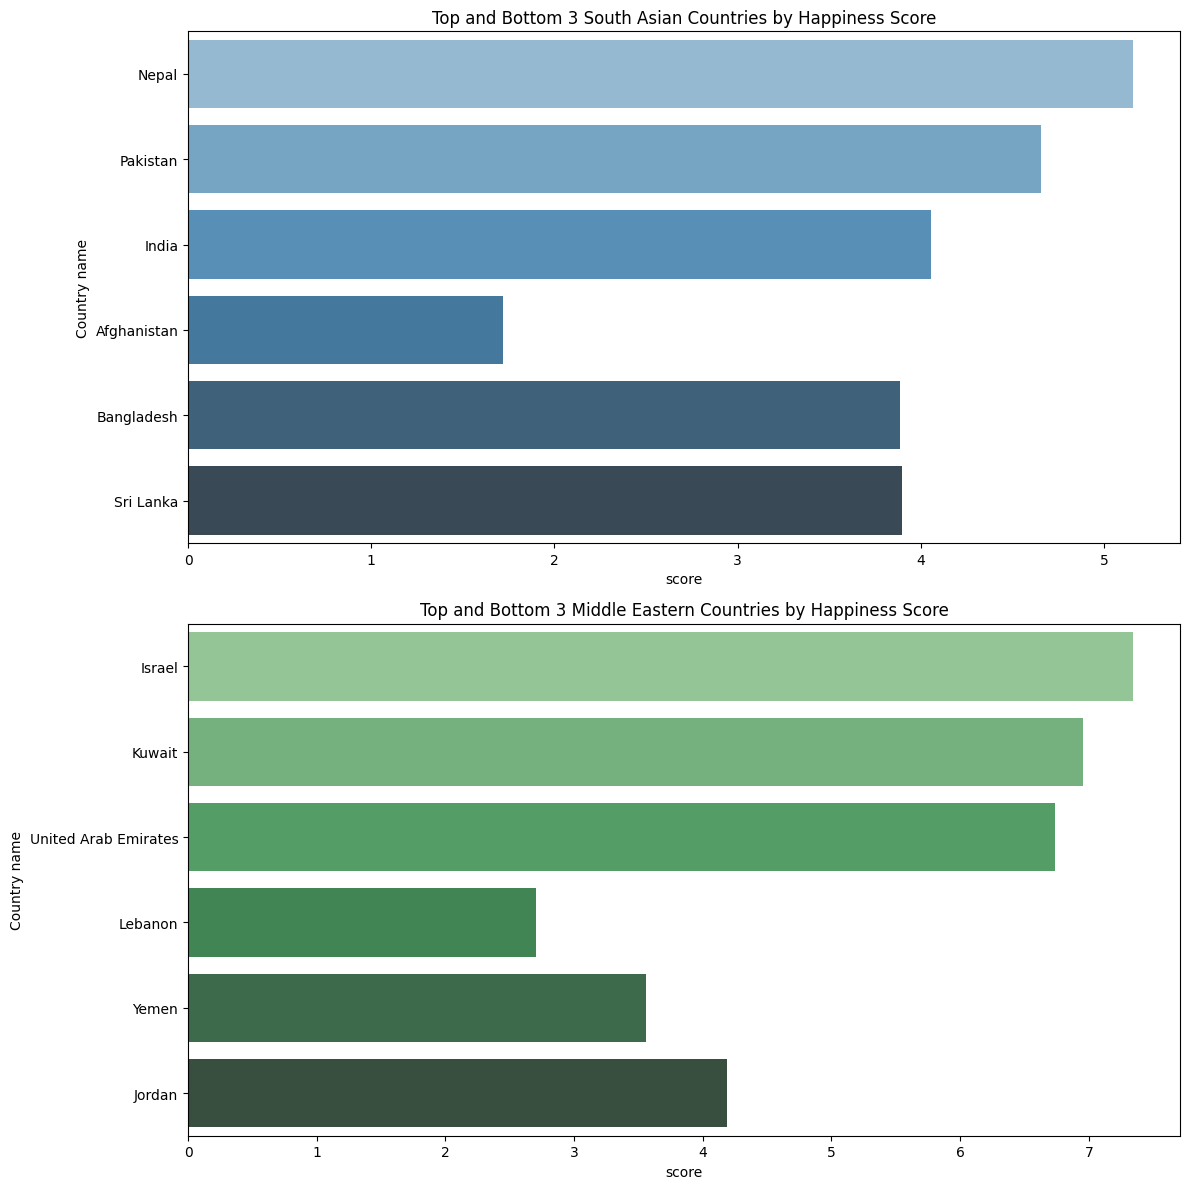

In [ ]:
# ---------------------------------------------------------------------
# Task - 3: Top and Bottom Performers
# ---------------------------------------------------------------------
# Top 3 and Bottom 3 countries by score in both regions
sa_top_3 = south_asia_df.nlargest(3, 'score')
sa_bottom_3 = south_asia_df.nsmallest(3, 'score')
me_top_3 = middle_east_df.nlargest(3, 'score')
me_bottom_3 = middle_east_df.nsmallest(3, 'score')

# Plot bar charts
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
sns.barplot(data=pd.concat([sa_top_3, sa_bottom_3]), x='score', y='Country name', ax=axes[0], palette='Blues_d')
axes[0].set_title('Top and Bottom 3 South Asian Countries by Happiness Score')
sns.barplot(data=pd.concat([me_top_3, me_bottom_3]), x='score', y='Country name', ax=axes[1], palette='Greens_d')
axes[1].set_title('Top and Bottom 3 Middle Eastern Countries by Happiness Score')
plt.tight_layout()
plt.show()

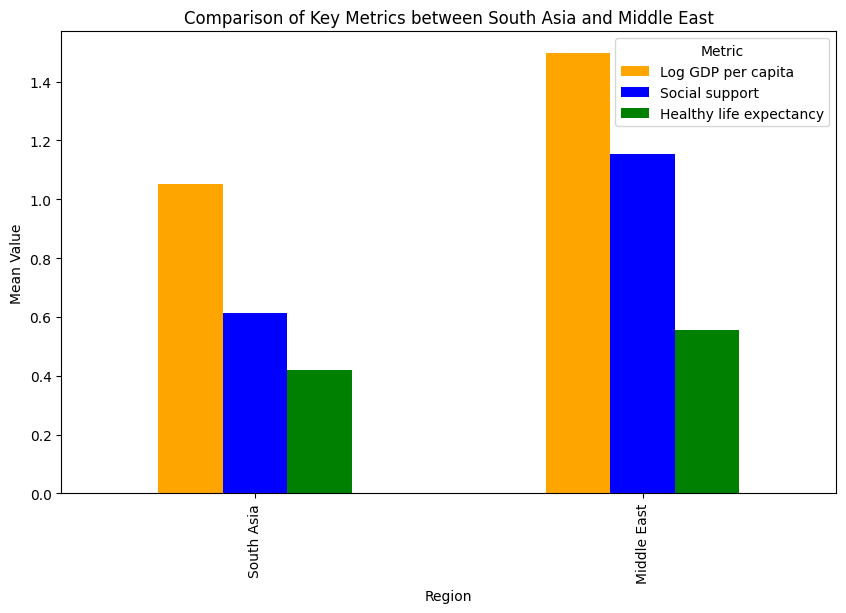


The largest disparity between the regions is in Social support.


In [ ]:
# Task - 4: Metric Comparisons
# ---------------------------------------------------------------------
# Compare GDP per Capita, Social Support, Healthy Life Expectancy
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
metric_means = {
    'South Asia': south_asia_df[metrics].mean(),
    'Middle East': middle_east_df[metrics].mean()
}
metric_df = pd.DataFrame(metric_means).T

# Grouped bar chart
metric_df.plot(kind='bar', figsize=(10, 6), color=['orange', 'blue', 'green'])
plt.title('Comparison of Key Metrics between South Asia and Middle East')
plt.ylabel('Mean Value')
plt.xlabel('Region')
plt.legend(title='Metric')
plt.show()

# Largest disparity
disparity = abs(metric_df.loc['South Asia'] - metric_df.loc['Middle East'])
largest_disparity_metric = disparity.idxmax()
print(f"\nThe largest disparity between the regions is in {largest_disparity_metric}.")

In [ ]:
# Task - 5: Happiness Disparity
# ---------------------------------------------------------------------
# Compute range and coefficient of variation (CV)
sa_range = south_asia_df['score'].max() - south_asia_df['score'].min()
me_range = middle_east_df['score'].max() - middle_east_df['score'].min()
sa_cv = sa_std / sa_mean
me_cv = me_std / me_mean

print(f"\nSouth Asia - Score Range: {sa_range}, CV: {sa_cv}")
print(f"Middle East - Score Range: {me_range}, CV: {me_cv}")

if sa_cv > me_cv:
    print("\nSouth Asia has greater variability in happiness scores.")
else:
    print("\nMiddle East has greater variability in happiness scores.")


South Asia - Score Range: 3.4370000000000003, CV: 0.3021482883337427
Middle East - Score Range: 4.634, CV: 0.28938880812119405

South Asia has greater variability in happiness scores.



Correlations for South Asia:
Freedom to make life choices    0.800519
Generosity                      0.874512
Name: score, dtype: float64

Correlations for Middle East:
Freedom to make life choices    0.863220
Generosity                      0.627524
Name: score, dtype: float64


<Figure size 1000x600 with 0 Axes>

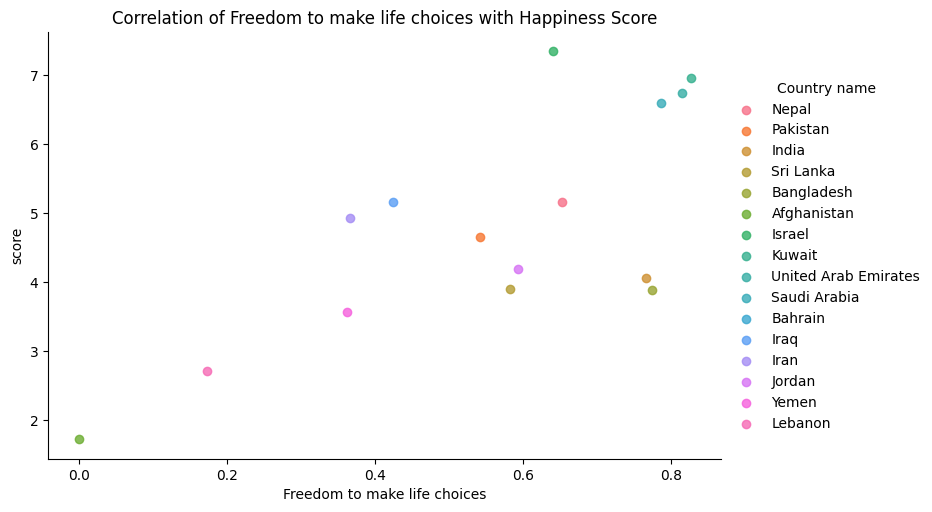

<Figure size 1000x600 with 0 Axes>

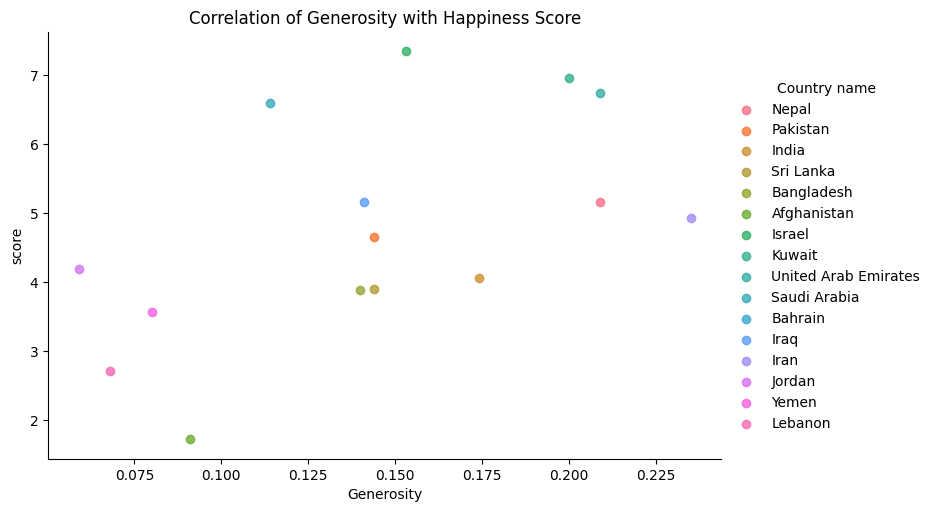

In [ ]:
# Task - 6: Correlation Analysis
# ---------------------------------------------------------------------
# Correlation of Score with Freedom and Generosity
correlations = {}
for region, dataset in [('South Asia', south_asia_df), ('Middle East', middle_east_df)]:
    correlations[region] = dataset[['score', 'Freedom to make life choices', 'Generosity']].corr().iloc[0, 1:]

# Visualize correlations
for region, corr in correlations.items():
    print(f"\nCorrelations for {region}:\n{corr}")

# Scatter plots with trendlines
for metric in ['Freedom to make life choices', 'Generosity']:
    plt.figure(figsize=(10, 6))
    sns.lmplot(data=pd.concat([south_asia_df, middle_east_df]), x=metric, y='score', hue='Country name', aspect=1.5)
    plt.title(f'Correlation of {metric} with Happiness Score')
    plt.show()



Outliers in South Asia:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


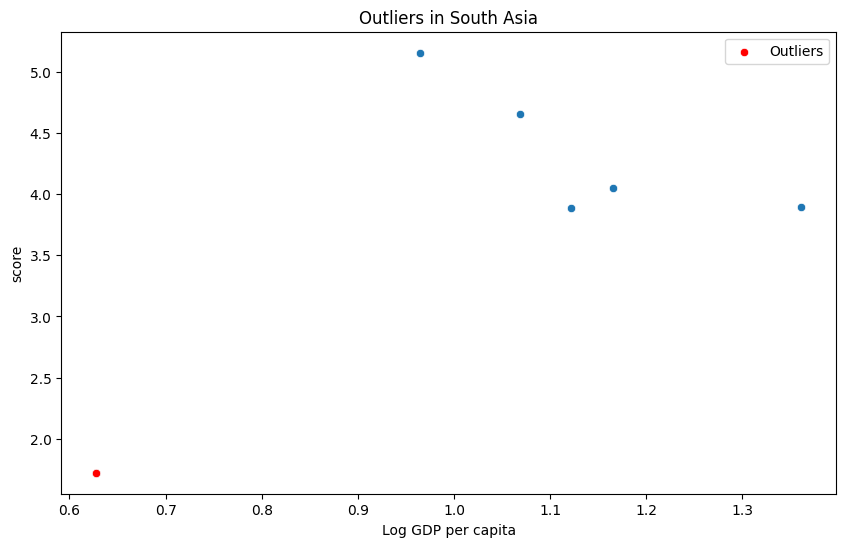


Outliers in Middle East:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


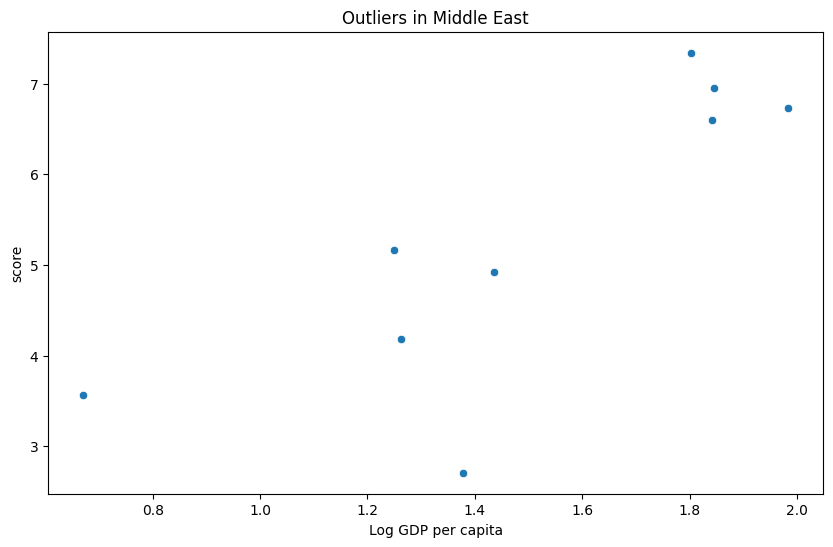

In [ ]:
# Task - 7: Outlier Detection
# ---------------------------------------------------------------------
# Detect outliers using 1.5 × IQR rule
for region, dataset in [('South Asia', south_asia_df), ('Middle East', middle_east_df)]:
    Q1 = dataset['score'].quantile(0.25)
    Q3 = dataset['score'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = dataset[(dataset['score'] < lower_bound) | (dataset['score'] > upper_bound)]
    print(f"\nOutliers in {region}:")
    print(outliers[['Country name', 'score', 'Log GDP per capita']])

    # Plot outliers
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=dataset, x='Log GDP per capita', y='score')
    sns.scatterplot(data=outliers, x='Log GDP per capita', y='score', color='red', label='Outliers')
    plt.title(f'Outliers in {region}')
    plt.show()


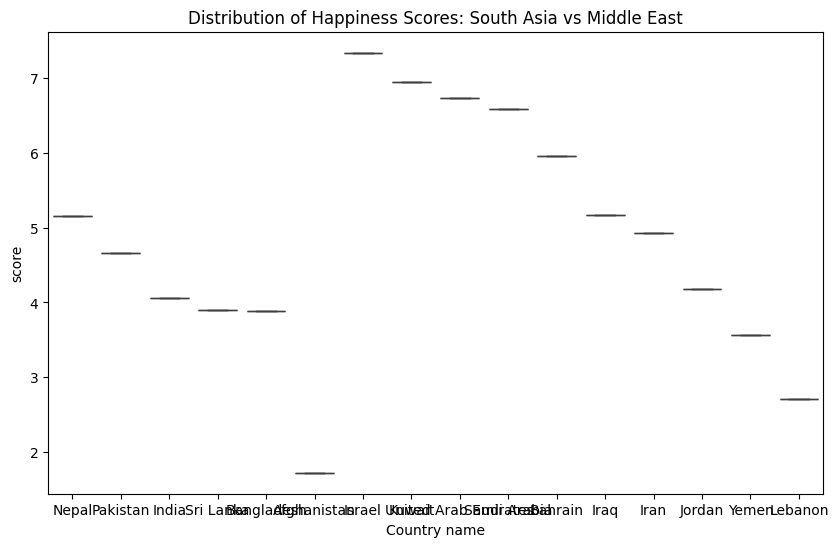

In [ ]:
# Task - 8: Visualization
# ---------------------------------------------------------------------
# Boxplot comparing Score distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.concat([south_asia_df, middle_east_df], keys=['South Asia', 'Middle East']), y='score', x='Country name')
plt.title('Distribution of Happiness Scores: South Asia vs Middle East')
plt.show()